Warning message in read.table("county_complete2.csv", sep = ",", header = TRUE):
“incomplete final line found by readTableHeader on 'county_complete2.csv'”

pop_2019,poverty_under_18_2019,updated
659680,22.8,150407.04
293531,13.1,38452.56
4328810,19.8,857104.38
392967,25.1,98634.72
10081570,20.8,2096966.56
705576,18.2,128414.83
943926,11.0,103831.86
556165,15.5,86205.57
2699428,23.0,620868.44
1036200,21.5,222783.00


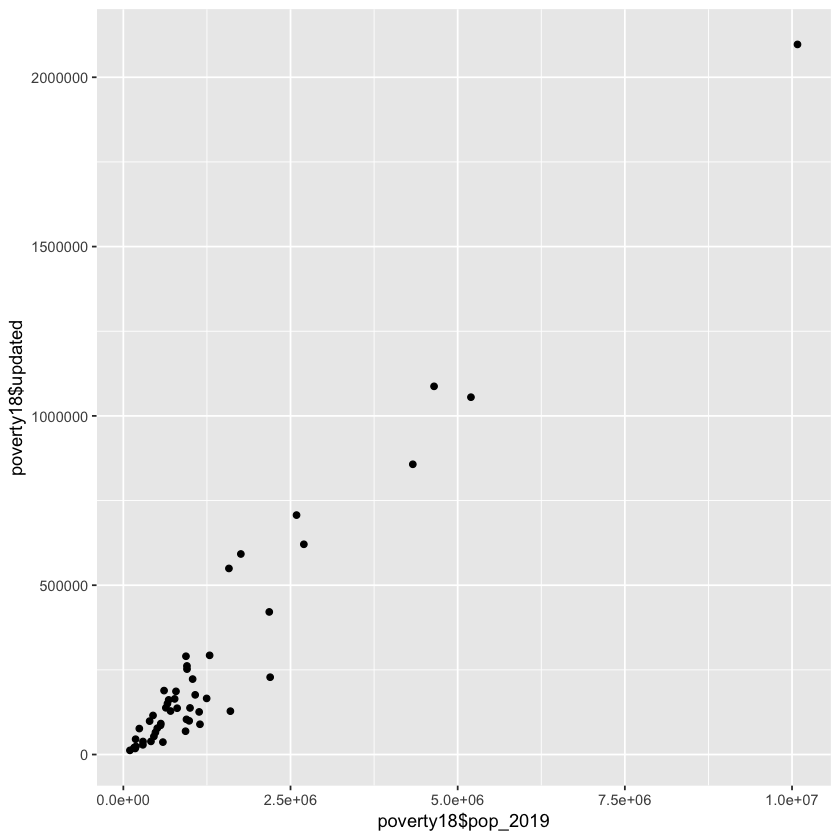

In [33]:
library(dplyr)
library(tidyr)
library(ggplot2)

county = read.table("county_complete1.csv", sep = ",", header = TRUE)

States = c('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
      'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
      'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
      'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
      'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming')


pop19 = c()
by_county = c()
table = data.frame(read.table("county_complete2.csv", sep = ",", header = TRUE))

for (s in States){
    state = filter(county, state == s)
   
    state2019 = state[!is.na(state$pop_2019), ]
    mX = max(state2019$pop_2019)
    by_county = data.frame(filter(county, pop_2019 == mX))
    pop19 <- rbind(pop19, by_county)
}

pop19 <- rbind(pop19, table)
pop19 = arrange(pop19, state)
# pop19








poverty18 = select(pop19, c('pop_2019', 'poverty_under_18_2019'))
# sel = select(pop19, state, median_household_income_2019, pop_2019)
poverty18$updated = (poverty18$pop_2019 * poverty18$poverty_under_18_2019)/100
poverty18
ggplot(poverty18, aes(poverty18$pop_2019, poverty18$updated)) + 
  geom_point()
